In [25]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


# Custom Imports
import wrangle_zillow
from env import get_db_url

# Clustering Project: Zillow Zestimates Prediction

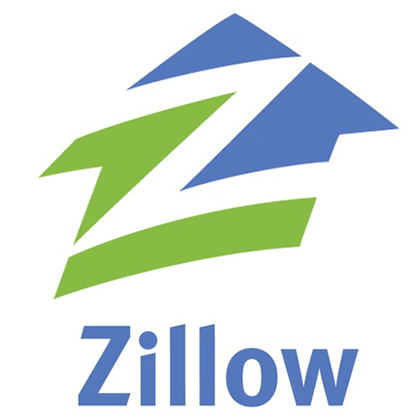

## Project Description:

The goal of this project is to identify drivers of error looking at logerror. The reason we want to be able to predict logerror to to better improve our current models. Improving our models helps better serve our customers at Zillow because we can give them the data they request without error. We want our customers to trust us and the best way to get them to do that is to be able to give them info that is accurate.

## Project Goals:

- Use clustering algorithms to help determine predictors of logerror to help improve the performance of our current model.
- Using drivers of logerror to help imrpove our model of property values.
- Improve understanding of logerror to better inform the use of models for property prediction.

## Executive Summary:


dafjdlfsajfdjkafldakjfkldjalfjdlkfjadlkfjdlakgjd;lkhj29rjojs

# Wrangle The Data

## Step 1: Acquire the data

#### Data was acquired from Zillow database in MySQL Workbench.

In [2]:
# Acquire function
df = wrangle_zillow.get_zillow()

In this step, I used SQL queries to pull what I wanted from Zillows tables.

## Step 2: Prepare Data

In this step, I created multiple functions that were meant to help me prepare my data for both exploration and modeling.

<b><font color = 'green'> handle_missing_values:</b></font> How to handle missing values based on minimum percentage of values for rows and columns

<b><font color = 'green'> wrangle_zillow:</b></font> The wrangle function has the acquire and handle_missing_values nested in it. This function is to explore on independent variables, which will help us decide what to use for clustering later.

Steps implemented: 

    - Get rid of null values in my columns (lose a lot of bulk, nearly no data loss) and redundant columns.
    - For the 'fips' column I both encode the zip codes to the appropriate countys (Los Angeles, Ventura, Orange County) and rename the column to 'County' for readability.
    - Removed outliers to many columns:
       - Bathroom and bedroom count range to 1 - 5
       - Logerror range to 0.5 to -0.31
       - Year built houses older than 1910
       - calculatefinishedsquarefeet range to 650 - 5500
       - taxvalluedollarcnt range to 40000 - 300000
<b><font color = 'green'> split:</b></font> This function splits the data into the 3 sets needed for exploring and statistical tests. I stratify on 'county' in this step.

<b><font color = 'green'>scale_data:</b></font> This function scales the the 3 split data sets. 

<b><font color = 'green'>wrangle_split_scale:</b></font>  This function combines everything in to one. We will do our clustering, testing, and modeling here.

# Explore

## The Big Questions: Can clustering help us predict logerror? Can clustering help us beat the baseline?

Our target variable is logerror, so we will be comparing it to individual features as well as combinations of features (clusters). 


## Initial Hypothesis :







In [22]:
# First, lets call what we need.
df = wrangle_zillow.wrangle_zillow()
train_scaled, validate_scaled, test_scaled = wrangle_zillow.wrangle_split_scale()

### Cluster on Land Columns (bedroomcnt, bathroomcnt, roomcnt, yearbuilt)

In [30]:
# Creating and naming
landcluster = train_scaled[['bedroomcnt', 'bathroomcnt','roomcnt','yearbuilt']]
# Make object
kmeans = KMeans(n_clusters=4)
kmeans.fit(landcluster)
# Use the thing
kmeans.predict(landcluster)

array([0, 3, 0, ..., 2, 0, 0], dtype=int32)

In [31]:
#storing this predicted cluster of data into original dataframe
train_scaled['landcluster'] = kmeans.predict(landcluster)

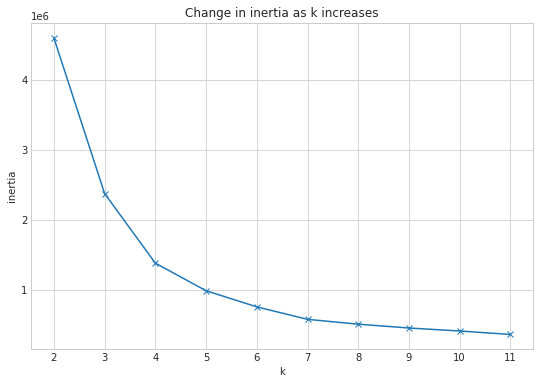

In [32]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(landcluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Cluster on Location Columns (latitude, longitude)

In [34]:
# Creating and naming
locationcluster = train_scaled[['latitude', 'longitude']]
# Make object
kmeans = KMeans(n_clusters=4)
kmeans.fit(locationcluster)
# Use the thing
kmeans.predict(locationcluster)
#storing this predicted cluster of data into original dataframe
train_scaled['locationcluster'] = kmeans.predict(locationcluster)

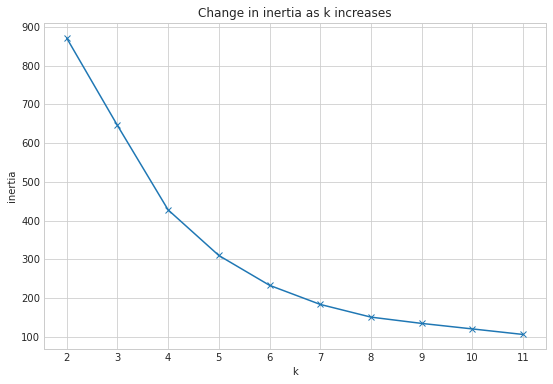

In [33]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(locationcluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Cluster on Tax Columns (taxvaluedollarcnt, landtaxvaluedollarcnt)

In [37]:
# Creating and naming
taxcluster = train_scaled[['taxvaluedollarcnt', 'landtaxvaluedollarcnt']]
# Make object
kmeans = KMeans(n_clusters=4)
kmeans.fit(taxcluster)
# Use the thing
kmeans.predict(taxcluster)
#storing this predicted cluster of data into original dataframe
train_scaled['taxcluster'] = kmeans.predict(taxcluster)

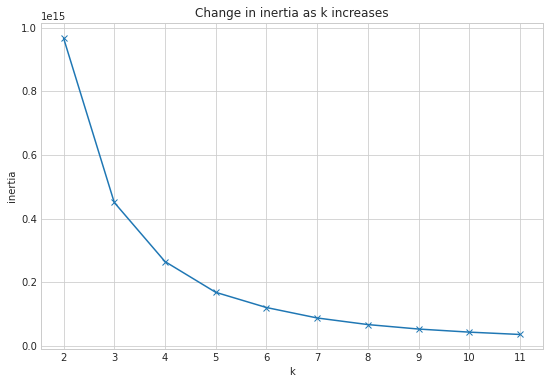

In [38]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(taxcluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Modeling

In [8]:
# Create the object
x_train = train_scaled.drop(columns = ['logerror'])
y_train = pd.DataFrame(train_scaled[['logerror']])

x_validate = validate_scaled.drop(columns = ['logerror'])
y_validate = pd.DataFrame(validate_scaled[['logerror']])

x_test = test_scaled.drop(columns = ['logerror'])
y_test = pd.DataFrame(test_scaled[['logerror']])

In [15]:
kmeans.cluster_centers_

array([[7.19857549e-02, 1.23710887e+05],
       [2.17994359e-01, 4.65207360e+05],
       [5.53866045e-01, 1.23378084e+06]])